<br>
<font>
<div dir=ltr align=center>
<font color=white size=15>
    Numerical Computations <br>
<font color=Red size=6>
<font color=white size=3>
    Samira Hossein Ghorban <br>
    Department of Computer Engineering <br>
    Sharif University of Technology (SUT) <br>
    Tehran, Iran <br>

<font color=696880 size=2>
........
<!-- <img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=center class="saturate" > -->

In computational science and engineering, solving non-linear ordinary differential equations (ODEs) is a critical task. These equations often model complex phenomena in various fields such as physics, biology, and engineering. The challenge lies in the fact that non-linear ODE systems do not generally have analytical solutions, necessitating the use of numerical methods.

Your task is to apply numerical methods to solve a complex system of non-linear ODEs. This involves first determining initial conditions from a set of non-linear equations and then using these conditions to solve the ODE system. 

### **Non-linear System of Equations for Initial Conditions:**

   Solve the following non-linear system of equations to find the initial conditions for the ODE system:

   $$
   x^3 + y - 10 = 0
   $$
   $$
   e^{-x} + \sin(z) - 1 = 0
   $$
   $$
   y^2 - z + 2 = 0
   $$

   Implement solvers for this system using the Newton-Raphson method.

#### **Newton-Raphson Method**
    
In the Newton-Raphson method, we iterate using the formula:
$$
\mathbf{x}_{n+1} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n) \cdot F(\mathbf{x}_n)
$$

where $ \mathbf{x}_n $ is the vector of variables at the nth iteration, $J$ is the Jacobian matrix, and $F$ is the vector of functions.

Start with an initial guess $x_{0}=1, y_{0}=1, z_{0}=1$

Generate three subplots showing how the estimated values of $x$, $y$ and $z$ change with each iteration.



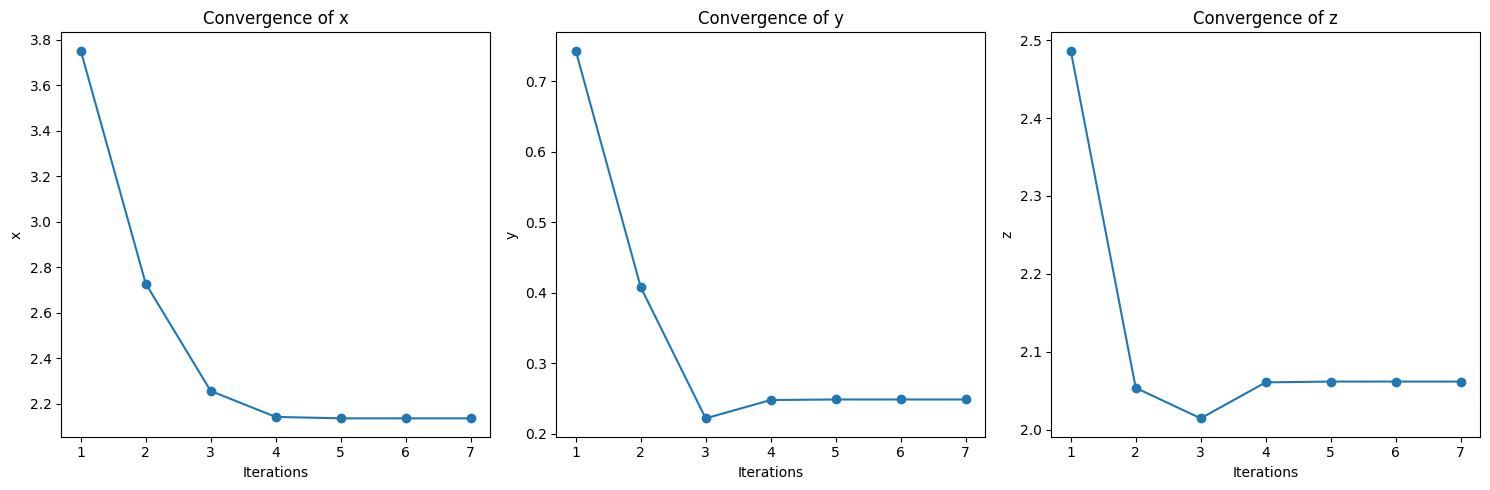

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def system_equations(vars):
    x, y, z = vars
    eq1 = x**3 + y - 10
    eq2 = np.exp(-x) + np.sin(z) - 1
    eq3 = y**2 - z + 2
    return np.array([eq1, eq2, eq3])


def jacobian_matrix(vars):
    x, y, z = vars
    dfdx = 3*x**2
    dfdy = 1
    dfdz = 0
    dgdx = -np.exp(-x)
    dgdy = 0
    dgdz = np.cos(z)
    dwdx = 0
    dwdy = 2*y
    dwdz = -1
    return np.array([[dfdx, dfdy, dfdz],
                     [dgdx, dgdy, dgdz],
                     [dwdx, dwdy, dwdz]])


def newton_raphson(initial_guess, tolerance=1e-6, max_iterations=1000):
    vars_values = np.array(initial_guess, dtype=float)
    iteration = 0
    x_values, y_values, z_values = [], [], []

    while iteration < max_iterations:
        f_values = system_equations(vars_values)
        jacobian = jacobian_matrix(vars_values)
        delta_vars = np.linalg.solve(jacobian, -f_values)
        vars_values += delta_vars

        x_values.append(vars_values[0])
        y_values.append(vars_values[1])
        z_values.append(vars_values[2])

        if np.linalg.norm(delta_vars) < tolerance:
            break

        iteration += 1

    return x_values, y_values, z_values


initial_guess = [1, 1, 1]

x_values, y_values, z_values = newton_raphson(initial_guess)

iterations = range(1, len(x_values) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(iterations, x_values, marker='o')
plt.title('Convergence of x')
plt.xlabel('Iterations')
plt.ylabel('x')

plt.subplot(1, 3, 2)
plt.plot(iterations, y_values, marker='o')
plt.title('Convergence of y')
plt.xlabel('Iterations')
plt.ylabel('y')

plt.subplot(1, 3, 3)
plt.plot(iterations, z_values, marker='o')
plt.title('Convergence of z')
plt.xlabel('Iterations')
plt.ylabel('z')

plt.tight_layout()
plt.show()

### **Non-linear ODE System:**

   Once you have the initial conditions from the Newton-Raphson method, use them to solve the non-linear ODE system:   
   $$ 
    \frac{dx}{dt} = yz - x 
   $$
   
   $$  \frac{dy}{dt} = x^2 - \cos(z)  $$
   $$ \frac{dz}{dt} = e^{-y} - xz  $$

   The solution to the ODE system using different numerical methods (Euler, Improved Euler, and 4th-order Runge-Kutta) can be interpreted from the final values of the variables $x$, $y$, and $z$ at the end of the time interval (from $ t = 0 $ to $ t = 10 $).
   at the end, show the final values of $x$, $y$, and $z$ at $ t = 10 $.   
   Let the time step dt be 0.1.   


#### **1. Euler's Method**

Euler's method is the simplest form of a numerical method for solving ordinary differential equations. The formulation is as follows:

Given a differential equation of the form $\frac{dy}{dt} = f(t, y)$ with an initial condition $y(t_0) = y_0$, the Euler method creates a sequence of approximations for $y$ at discrete time steps. For a step size $dt$, the formulation is:

$$
y_{n+1} = y_n + dt \cdot f(t_n, y_n)
$$

where $y_n$ is the approximation of $y$ at time $t_n$.


#### **2. Improved Euler's Method (Heun's Method)**

Improved Euler's Method, also known as Heun's Method, is a simple modification of Euler's method that generally gives better accuracy. It uses an average of the slopes at the beginning and the end of the interval to compute the next value. The formulation is:

$$
\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + dt, y_n + dt \cdot k_1) \\
y_{n+1} &= y_n + \frac{dt}{2} \cdot (k_1 + k_2)
\end{align*}
$$


#### **3. Runge-Kutta 4th Order Method**
    
The 4th Order Runge-Kutta Method (RK4) is a much more accurate method compared to Euler's and Improved Euler's methods. It involves calculating four intermediate slopes and taking a weighted average of these slopes to compute the next value. The formulation is:

$$
\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_1\right) \\
k_3 &= f\left(t_n + \frac{dt}{2}, y_n + \frac{dt}{2} \cdot k_2\right) \\
k_4 &= f(t_n + dt, y_n + dt \cdot k_3) \\
y_{n+1} &= y_n + \frac{dt}{6} \cdot (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

Each of these methods offers different levels of accuracy and computational complexity. Euler's method is the simplest but least accurate, Improved Euler's method offers a better balance, and RK4 provides high accuracy at the cost of increased computational efforts.

In [2]:
def ode_system(t, vars):
    x, y, z = vars
    dxdt = y * z - x
    dydt = x**2 - np.cos(z)
    dzdt = np.exp(-y) - x * z
    return np.array([dxdt, dydt, dzdt])


def euler_method(initial_conditions, dt, num_steps):
    time_values = np.arange(0, num_steps * dt, dt)
    vars_values = np.zeros((num_steps, 3))
    vars_values[0] = initial_conditions

    for i in range(1, num_steps):
        vars_values[i] = vars_values[i-1] + dt * ode_system(time_values[i-1], vars_values[i-1])

    return time_values, vars_values


def improved_euler_method(initial_conditions, dt, num_steps):
    time_values = np.arange(0, num_steps * dt, dt)
    vars_values = np.zeros((num_steps, 3))
    vars_values[0] = initial_conditions

    for i in range(1, num_steps):
        k1 = ode_system(time_values[i-1], vars_values[i-1])
        k2 = ode_system(time_values[i-1] + dt, vars_values[i-1] + dt * k1)
        vars_values[i] = vars_values[i-1] + 0.5 * dt * (k1 + k2)

    return time_values, vars_values


def runge_kutta_4th_order_method(initial_conditions, dt, num_steps):
    time_values = np.arange(0, num_steps * dt, dt)
    vars_values = np.zeros((num_steps, 3))
    vars_values[0] = initial_conditions

    for i in range(1, num_steps):
        k1 = ode_system(time_values[i-1], vars_values[i-1])
        k2 = ode_system(time_values[i-1] + 0.5 * dt, vars_values[i-1] + 0.5 * dt * k1)
        k3 = ode_system(time_values[i-1] + 0.5 * dt, vars_values[i-1] + 0.5 * dt * k2)
        k4 = ode_system(time_values[i-1] + dt, vars_values[i-1] + dt * k3)
        vars_values[i] = vars_values[i-1] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return time_values, vars_values


initial_conditions_newton = [x_values[-1], y_values[-1], z_values[-1]]

dt = 0.1
num_steps = int(10 / dt)

time_euler, vars_euler = euler_method(initial_conditions_newton, dt, num_steps)
time_improved_euler, vars_improved_euler = improved_euler_method(initial_conditions_newton, dt, num_steps)
time_rk4, vars_rk4 = runge_kutta_4th_order_method(initial_conditions_newton, dt, num_steps)

#### **Visualization**
    
Also make three subplots showing how the estimated values of $x$, $y$ and $z$ change over time using each method.


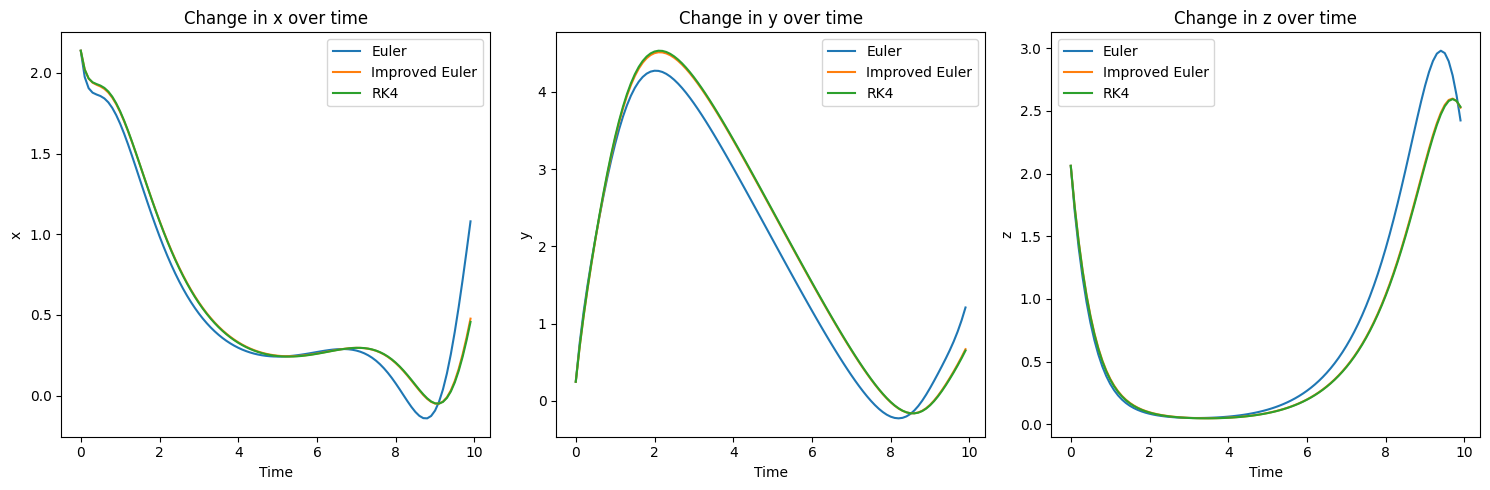

Final values at t = 10:
Euler's Method:  [1.07987107 1.20965774 2.42367222]
Improved Euler's Method:  [0.47742782 0.66959982 2.52573617]
4th Order Runge-Kutta Method:  [0.45713201 0.65187693 2.53178714]


In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(time_euler, vars_euler[:, 0], label='Euler')
plt.plot(time_improved_euler, vars_improved_euler[:, 0], label='Improved Euler')
plt.plot(time_rk4, vars_rk4[:, 0], label='RK4')
plt.title('Change in x over time')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(time_euler, vars_euler[:, 1], label='Euler')
plt.plot(time_improved_euler, vars_improved_euler[:, 1], label='Improved Euler')
plt.plot(time_rk4, vars_rk4[:, 1], label='RK4')
plt.title('Change in y over time')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(time_euler, vars_euler[:, 2], label='Euler')
plt.plot(time_improved_euler, vars_improved_euler[:, 2], label='Improved Euler')
plt.plot(time_rk4, vars_rk4[:, 2], label='RK4')
plt.title('Change in z over time')
plt.xlabel('Time')
plt.ylabel('z')
plt.legend()

plt.tight_layout()
plt.show()

final_values_euler = vars_euler[-1]
final_values_improved_euler = vars_improved_euler[-1]
final_values_rk4 = vars_rk4[-1]

print("Final values at t = 10:")
print("Euler's Method: ", final_values_euler)
print("Improved Euler's Method: ", final_values_improved_euler)
print("4th Order Runge-Kutta Method: ", final_values_rk4)



### **Fixed Point Iteration Method**

Fixed Point Iteration is a method of computing fixed points of iterated functions. For a function $ g(x) $, a point $ x $ is called a fixed point if $ g(x) = x $. In the context of root finding, we can manipulate the root-finding problem $ f(x) = 0 $ into a fixed point problem $ x = g(x) $ and use Fixed Point Iteration to solve it.

You are provided with the following iterative functions derived from the equation $ f(x) = x^2 - 3x + 2 $:
1. $ g_1(x) = \frac{1}{3}x^2 + \frac{2}{3} $
2. $ g_2(x) = \sqrt{3x - 2} $
3. $ g_3(x) = 3 - \frac{2}{x} $


Analyze the convergence criterion by evaluating the derivative of each $ g_i(x) $ at the root $ x = 2 $. A sufficient condition for local convergence of the method is $ |g'_i(x)| < 1 $ at the fixed point.



**Fixed Point Iteration**:
   - Implement the Fixed Point Iteration method using each $ g_i(x) $. The method should iterate until the absolute difference between successive iterations is less than $10^{-6}$ or until a maximum number of iterations is reached.
    Choose the starting value of $x$ to be $x0 = 3$.

In [4]:
def fixed_point_iteration(g, x0, tolerance=1e-6, max_iterations=1000):
    x_values = [x0]

    for i in range(1, max_iterations + 1):
        x = g(x_values[-1])
        x_values.append(x)

        if abs(x_values[-1] - x_values[-2]) < tolerance:
            break

    return x_values


def g1(x):
    return (1 / 3) * x ** 2 + (2 / 3)


def g1_prime(x):
    return (2 / 3) * x


def g2(x):
    return np.sqrt(3 * x - 2)


def g2_prime(x):
    return 3 / (2 * np.sqrt(3 * x - 2))


def g3(x):
    return 3 - 2 / x


def g3_prime(x):
    return 2 / x ** 2


x0 = 3
root = 2

 **Visualization**:
   - Plot the values of $ x $ at each iteration to visualize the convergence or divergence for each function.

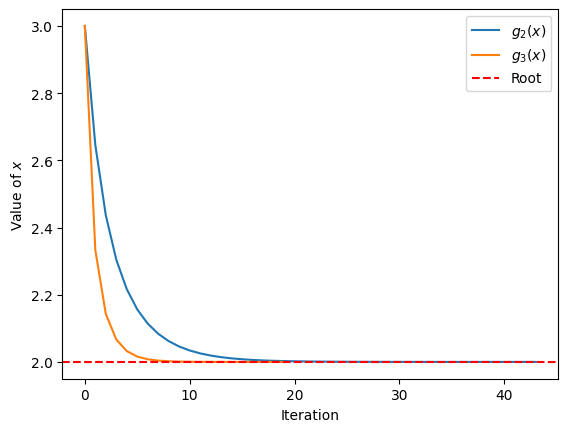

In [7]:
# x_values_1 = fixed_point_iteration(g1, x0)
# plt.plot(x_values_1, label='$g_1(x)$')

x_values_2 = fixed_point_iteration(g2, x0)
plt.plot(x_values_2, label='$g_2(x)$')

x_values_3 = fixed_point_iteration(g3, x0)
plt.plot(x_values_3, label='$g_3(x)$')

plt.axhline(y=root, color='r', linestyle='--', label='Root')

plt.xlabel('Iteration')
plt.ylabel('Value of $x$')
plt.legend()
plt.show()


**Analysis and Discussion**:
   - Based on the derivative analysis, predict the convergence behavior for each $ g_i(x) $.
   - Compare your predictions with the actual iteration results obtained from your implementation.
   - Discuss any differences between the expected and actual behavior.

## Your Explanation
Predictions based on Derivative Analysis:
for g1(x), |g1'(2)| = 4/3 > 1, so g1(x) might not converge locally
for g2(x), |g2'(2)| = 3/(2*sqrt(2)) < 1, so g2(x) is expected to converge locally
for g3(x), |g3'(2)| = 1/2 < 1, so g3(x) is expected to converge locally

Actual Iteration Results:
for g1(x), the iteration results for g1(x) show that it diverges. This aligns with the prediction based on derivative
analysis.
for g2(x), the iteration results for g2(x) show that it converges. This aligns with the prediction based on derivative 
analysis.
for g3(x), the iteration results for g3(x) show that it converges. This aligns with the prediction based on derivative 
analysis.

Discussion:
The derivative analysis provides a useful criterion for predicting convergence behavior. However, it's important to note
that the actual behavior might be influenced by factors like the choice of initial value(x0). In conclusion, while
derivative analysis provides valuable insights, actual implementation results and considerations such as initial values
play a crucial role in understanding the convergence behavior of Fixed Point Iteration methods.